<a href="https://colab.research.google.com/github/KATTA-00/CO542-Neural-Networks-Labs/blob/main/lab05/E19129)lab05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CO542 - Neural Networks and Fuzzy Systems
## E/19/129 - K.H. Gunawardana

### Lab 05: Convolutional Neural Networks (CNN)

### **Installation and Creating a CNN Model**

In [1]:
!pip install torch torchvision

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten = nn.Flatten()
        self.fc = nn.Linear(32 * 13 * 13, 10)  # Assuming input images are 28x28

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.flatten(x)
        x = self.fc(x)
        return x

# Create an instance of CNN model
model = CNN()

### **Task: Image Classification using CNN (MNIST Dataset)**

In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Define transformations
transform = transforms.Compose([
    transforms.ToTensor(),                # Converts image to PyTorch tensor
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]
])

# Load training and test datasets
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

In [4]:
import torch.nn as nn
import torch.nn.functional as F

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # First conv layer: 1 input channel (grayscale), 32 output channels, 3x3 kernel
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.drop1 = nn.Dropout(0.25)

        # Second conv layer: 32 input channels, 64 output channels, 3x3 kernel
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.drop2 = nn.Dropout(0.25)

        # Third conv layer: 64 input channels, 128 output channels, 3x3 kernel
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.drop3 = nn.Dropout(0.25)

        # Calculate output size after conv + pooling: 128x1x1 (approx)
        self.fc1 = nn.Linear(128, 128)
        self.fc2 = nn.Linear(128, 10)  # 10 output classes

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.drop1(x)
        x = self.pool2(F.relu(self.conv2(x)))
        x = self.drop2(x)
        x = self.pool3(F.relu(self.conv3(x)))
        x = self.drop3(x)

        x = torch.flatten(x, 1)  # Flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [5]:
import torch.optim as optim

# Device configuration (use GPU if available)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_cnn = CNN().to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [6]:
device

device(type='cuda')

In [7]:
train_losses = []
train_accuracies = []

In [8]:
# Training loop
num_epochs = 5
for epoch in range(num_epochs):
    model_cnn.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()              # Clear gradients
        outputs = model_cnn(images)            # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()                    # Backpropagation
        optimizer.step()                   # Update weights

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss:.4f}, Accuracy: {accuracy:.2f}%")

Epoch [1/5], Loss: 2163.5665, Accuracy: 10.49%
Epoch [2/5], Loss: 2163.5475, Accuracy: 10.60%
Epoch [3/5], Loss: 2163.4179, Accuracy: 10.60%
Epoch [4/5], Loss: 2163.8892, Accuracy: 10.43%
Epoch [5/5], Loss: 2163.6553, Accuracy: 10.64%


In [9]:
import numpy as np

model_cnn.eval()
correct = 0
total = 0
misclassified_images = []
misclassified_labels = []
misclassified_preds = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model_cnn(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        # Store misclassified
        for i in range(len(labels)):
            if predicted[i] != labels[i]:
                misclassified_images.append(images[i].cpu())
                misclassified_labels.append(labels[i].cpu())
                misclassified_preds.append(predicted[i].cpu())

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")

Test Accuracy: 9.90%


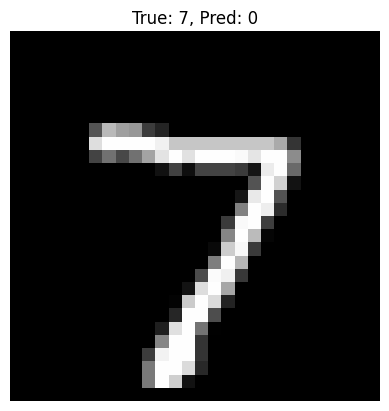

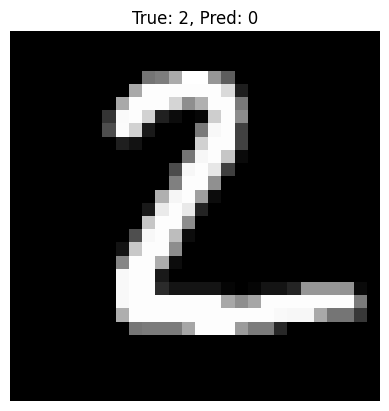

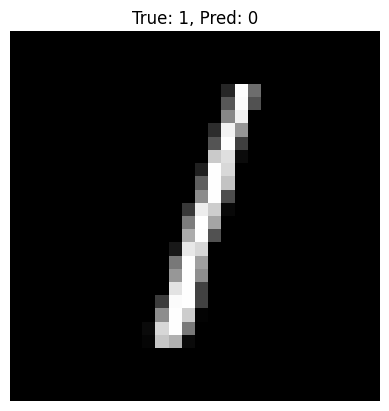

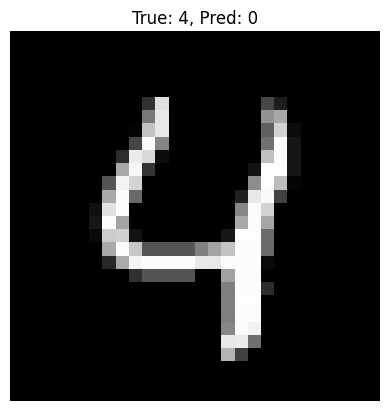

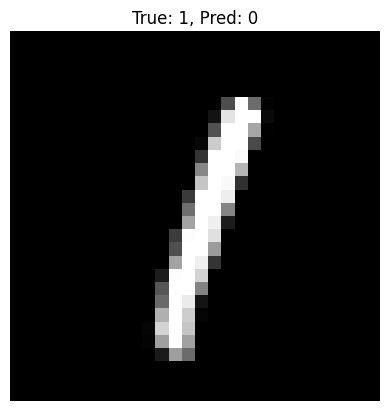

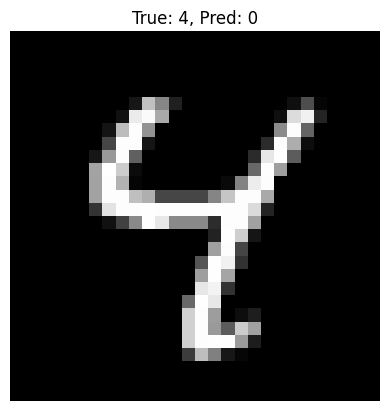

In [11]:
import matplotlib.pyplot as plt

def imshow(img):
    img = img * 0.5 + 0.5  # Unnormalize from [-1,1] to [0,1]
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)), cmap='gray')
    plt.axis('off')
    plt.show()

# Show 6 misclassified images
for i in range(6):
    plt.title(f"True: {misclassified_labels[i]}, Pred: {misclassified_preds[i]}")
    imshow(misclassified_images[i])

#### Experiment with different activation functions (e.g., ReLU, LeakyReLU) and compare their performance.

In [ ]:
class CNN_LeakyReLU(nn.Module):
    def __init__(self):
        super(CNN_LeakyReLU, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.drop1 = nn.Dropout(0.25)

        self.conv2 = nn.Conv2d(32, 64, kernel_size=3)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.drop2 = nn.Dropout(0.25)

        self.conv3 = nn.Conv2d(64, 128, kernel_size=3)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.drop3 = nn.Dropout(0.25)

        self.fc1 = nn.Linear(128, 128)
        self.fc2 = nn.Linear(128, 10)
        self.leaky_relu = nn.LeakyReLU(0.01)

    def forward(self, x):
        x = self.pool1(self.leaky_relu(self.conv1(x)))
        x = self.drop1(x)
        x = self.pool2(self.leaky_relu(self.conv2(x)))
        x = self.drop2(x)
        x = self.pool3(self.leaky_relu(self.conv3(x)))
        x = self.drop3(x)
        x = torch.flatten(x, 1)
        x = self.leaky_relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
model_leaky = CNN_LeakyReLU().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_leaky.parameters(), lr=0.001)

In [ ]:
# Training loop
num_epochs = 5
for epoch in range(num_epochs):
    model_leaky.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()              # Clear gradients
        outputs = model_leaky(images)            # Forward pass
        loss = criterion(outputs, labels)  # Compute loss
        loss.backward()                    # Backpropagation
        optimizer.step()                   # Update weights

        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss:.4f}, Accuracy: {accuracy:.2f}%")

#### Extend the model to classify CIFAR-10 dataset images.

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize to [-1, 1]
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = DataLoader(trainset, batch_size=64, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = DataLoader(testset, batch_size=64, shuffle=False)

classes = trainset.classes

In [ ]:
class CIFAR10_CNN(nn.Module):
    def __init__(self):
        super(CIFAR10_CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)

        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.25)

        self.fc1 = nn.Linear(128 * 4 * 4, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))
        x = self.dropout(x)
        x = torch.flatten(x, 1)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [ ]:
model = CIFAR10_CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
epochs = 10
for epoch in range(epochs):
    running_loss = 0.0
    model.train()
    for inputs, labels in trainloader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs}, Loss: {running_loss/len(trainloader):.4f}")


In [ ]:
correct = 0
total = 0
model.eval()

with torch.no_grad():
    for inputs, labels in testloader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Test Accuracy: {100 * correct / total:.2f}%")

In [ ]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(testloader)
images, labels = next(dataiter)
outputs = model(images.to(device))
_, predicted = torch.max(outputs, 1)

imshow(torchvision.utils.make_grid(images[:4]))
print('GroundTruth:', ' '.join(classes[labels[j]] for j in range(4)))
print('Predicted:', ' '.join(classes[predicted[j]] for j in range(4)))

### **Questions:**

#### How does the CNN classify different digits in the MNIST dataset?

In [ ]:
# Show what convolutional filters learn (early feature maps)
import matplotlib.pyplot as plt

def visualize_feature_maps(model, image):
    model.eval()
    image = image.unsqueeze(0).to(device)  # Add batch dimension
    with torch.no_grad():
        x = model_cnn.conv1(image)
    fig, axes = plt.subplots(4, 8, figsize=(12, 6))
    for i, ax in enumerate(axes.flat):
        if i < x.shape[1]:
            ax.imshow(x[0, i].cpu(), cmap='gray')
            ax.axis('off')
    plt.suptitle("Feature Maps After First Conv Layer")
    plt.tight_layout()
    plt.show()

# Pass a sample image to visualize filters
sample_img, _ = test_dataset[0]
visualize_feature_maps(model, sample_img)

- Convolutional Neural Networks (CNNs) classify handwritten digits in the MNIST dataset through hierarchical feature extraction and probabilistic classification. The 28x28 grayscale images, normalized between 0 and 1, are reshaped for CNN input. Early convolutional layers apply small filters (e.g., 3x3 kernels) to detect simple features like edges and corners, visualized as feature maps highlighting key patterns. Deeper layers combine these into complex shapes such as curves and loops. ReLU activations introduce non-linearity for better modeling. Max-pooling layers reduce spatial dimensions, preserving important features and improving computational efficiency and spatial invariance. After convolution and pooling, feature maps are flattened and passed through fully connected layers, culminating in a softmax layer that outputs digit class probabilities. The network is trained using categorical cross-entropy loss and optimized by backpropagation, allowing it to learn filters that specialize in recognizing digit components, thus enabling accurate classification.

#### Compare ReLU and LeakyReLU activation functions. What are the advantages of LeakyReLU?

In [ ]:
import torch
import torch.nn as nn

# Sample input tensor with positive and negative values
x = torch.tensor([-3.0, -1.0, 0.0, 1.0, 3.0], requires_grad=True)

# Define ReLU and LeakyReLU activation functions
relu = nn.ReLU()
leaky_relu = nn.LeakyReLU(negative_slope=0.01)

# Forward pass through ReLU
y_relu = relu(x)
print("ReLU output:", y_relu)

# Forward pass through LeakyReLU
y_leaky = leaky_relu(x)
print("LeakyReLU output:", y_leaky)

# Backward pass to check gradients
y_relu.sum().backward(retain_graph=True)
print("ReLU gradients:", x.grad)

# Reset gradients
x.grad.zero_()

y_leaky.sum().backward()
print("LeakyReLU gradients:", x.grad)

- ReLU (Rectified Linear Unit) and LeakyReLU are popular activation functions used in neural networks, differing mainly in how they handle negative inputs. When tested on an input tensor with both negative and positive values, ReLU outputs zero for all negative inputs, effectively “turning off” those neurons. This is reflected in its gradient behavior as well—ReLU gradients are zero for negative inputs, which can lead to the problem of “dying neurons” that stop learning because their weights no longer get updated during backpropagation.
- In contrast, LeakyReLU allows a small, non-zero output for negative inputs by multiplying them by a small slope (e.g., 0.01). This behavior is clearly seen in the outputs, where LeakyReLU produces small negative values instead of zero, and in its gradients, which remain non-zero for negative inputs. The advantage of LeakyReLU’s non-zero gradients is that it prevents neurons from dying and ensures continuous learning across the entire input range. This consistent gradient flow helps stabilize training, especially in deep networks, and can lead to better convergence and improved performance in certain scenarios compared to standard ReLU.

#### What is the role of MaxPooling layers in CNNs?

- MaxPooling layers in Convolutional Neural Networks (CNNs) serve several important functions. Primarily, they reduce the spatial dimensions of feature maps by selecting the maximum value within small windows (e.g., 2x2), which decreases computational complexity and the number of parameters in later layers. This downsampling helps retain the strongest and most salient features while suppressing noise and less important details. MaxPooling also introduces a level of translation invariance, making the model more robust to small shifts or distortions in the input images. By focusing on key features and reducing information overload, MaxPooling layers contribute to improved generalization and help prevent overfitting, ultimately enhancing the CNN’s performance on image recognition tasks.

#### How does dropout improve generalization in neural networks?

- Dropout improves generalization in neural networks by preventing overfitting through randomly disabling a fraction of neurons during training. This forces the network to develop independent and redundant feature representations, reducing harmful co-adaptations between neurons. Dropout effectively creates an ensemble of many different subnetworks, which are averaged at test time, enhancing robustness. Additionally, it acts as noise injection that makes the model less sensitive to noisy or corrupted data, improving stability and reducing reliance on specific features. By promoting feature independence and reducing overfitting, dropout helps the network generalize better to unseen data, especially when applied to fully connected layers.



#### 5. What are the key differences when extending the model to classify CIFAR-10 images?

- Extending a CNN model from MNIST to CIFAR-10 classification involves several key differences due to CIFAR-10's higher complexity. Unlike MNIST's 28x28 grayscale images, CIFAR-10 consists of 32x32 color images with three RGB channels, requiring the network to process more complex textures and color information. Architecturally, CIFAR-10 models often require deeper networks (5 to 20+ convolutional layers) with techniques like batch normalization and skip connections (e.g., ResNet) to effectively capture hierarchical features and avoid vanishing gradients. Data augmentation such as random flips, rotations, and shifts becomes essential to improve generalization and reduce overfitting on CIFAR-10’s more varied dataset. Training parameters also differ, typically involving smaller learning rates, longer training epochs, and optimizers like Adam or AdamW. Furthermore, CIFAR-10 models often employ stronger regularization strategies such as dropout and L2 weight decay. Finally, transfer learning from pre-trained networks on larger datasets can significantly boost performance, addressing CIFAR-10’s challenges in feature extraction and limited training data.